In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/suriya/milestones/intro2pde


In [3]:
ls

bacterial_growth_ode/  lorenz_eqn/    Numerical_Notebooks/  reset_gpu.sh
CONFIG.py              ML_Notebooks/  Pramana_Format/       van_der_pol_2d/
data/                  model_base.py  README.md
harmonic_ode_1d/       nn/            README.org


## Read data from file

In [5]:
import pickle

data = pickle.load(open('data/generate_data.pkl', 'rb'))
data

(array([0.0000000e+00, 8.0000320e-05, 1.6000064e-04, ..., 1.9999840e+01,
        1.9999920e+01, 2.0000000e+01]),
 array([[1.        , 2.        ],
        [0.99989333, 2.00008   ],
        [0.99978665, 2.00015998],
        ...,
        [0.96196449, 1.85862713],
        [0.96186901, 1.85870409],
        [0.96177353, 1.85878103]]))

In [11]:
data[1][:, 0].shape

(250000,)

In [13]:
import pandas as pd

df = pd.DataFrame({
    't' : data[0],
    'x' : data[1][:, 0],
    'y' : data[1][:, 1]
})

## Plot data

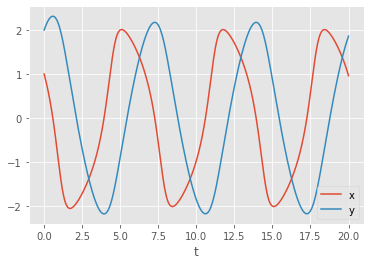

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(df.t, df.x, label='x')
plt.plot(df.t, df.y, label='y')
plt.xlabel('t')
plt.legend();

## Gaussian Process Regression

In [48]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [54]:
def fit_gp_with_rbf(X, y):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)
    X, y = X.reshape(-1, 1), y.reshape(-1, 1) 
    gp.fit(X, y)
    return gp, gp.score(X, y)

In [103]:
import numpy as np

N = df.shape[0]
k = N / 100

idx = np.arange(0, N, k).astype(int)
print('(N, k, len(idx)) => ', N, k, len(idx))
t = df.t.loc[idx].to_numpy()
x = df.x.loc[idx].to_numpy()
y = df.y.loc[idx].to_numpy()

gpr_x, score = fit_gp_with_rbf(t, x)
print('GPR [x]:', score)
gpr_y, score = fit_gp_with_rbf(t, y)
print('GPR [y]:', score)

(N, k, len(idx)) =>  250000 2500.0 100


/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GPR [x]: 0.9999999999946632


/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GPR [y]: 0.9999999999679087


In [104]:
t_all = df.t.to_numpy().reshape(-1, 1)
x_hat = gpr_x.predict(t_all)
y_hat = gpr_y.predict(t_all)

In [109]:
cerulean = '#00BEFF'
oldgold = '#D4CA3A'
hotpink = '#FF6DAE'
aquablue = '#67E1B5'
mauve = '#EBACFA'
seapink = '#F1988E'
fern = '#5DB15A'

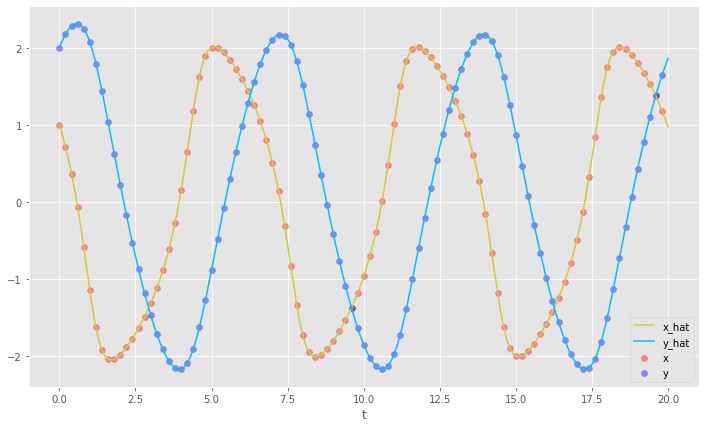

In [117]:
plt.figure(figsize=(12, 7))
plt.scatter(t, x, label='x', c='#FF000066')
plt.plot(t_all, x_hat, label='x_hat', c=oldgold)
plt.scatter(t, y, label='y', c="#0000FF66")
plt.plot(t_all, y_hat, label='y_hat', c=cerulean)
plt.xlabel('t')
plt.legend();